# A brief visualization of the the daily exchange rates per Euro 1999-2021

In [1]:
import logging

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

In [2]:
# reading the data
exchange_rates = pd.read_csv(r'data/euro-daily-hist_1999_2021.csv')

## Visualising some of the first rows

In [3]:
exchange_rates.head()

,Period\Unit:,[Argentine peso ],[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],...,[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[New Taiwan dollar ],[US dollar ],[South African rand ]
0,2021-09-20,NaN,1.6201,1.9558,6.2495,1.5056,1.0883,7.5726,NaN,25.432,...,86.0700,10.2173,1.5839,NaN,NaN,39.0620,10.1512,NaN,1.1711,17.3301
1,2021-09-17,NaN,1.6111,1.9558,6.2039,1.4913,1.0931,7.6044,NaN,25.296,...,85.4338,10.1553,1.5851,NaN,NaN,39.1450,10.1323,NaN,1.1780,17.1891
2,2021-09-16,NaN,1.6077,1.9558,6.1611,1.4863,1.0886,7.5849,NaN,25.281,...,85.2347,10.1518,1.5805,NaN,NaN,38.9180,9.9663,NaN,1.1763,17.0544
3,2021-09-15,NaN,1.6153,1.9558,6.1979,1.5004,1.0845,7.6069,NaN,25.318,...,85.9738,10.1360,1.5860,NaN,NaN,38.8650,9.9769,NaN,1.1824,16.8973
4,2021-09-14,NaN,1.6114,1.9558,6.1788,1.4951,1.0887,7.6168,NaN,25.389,...,86.1062,10.1453,1.5870,NaN,NaN,38.9270,9.9848,NaN,1.1814,16.8097


## Visualising some of the last rows

In [4]:
exchange_rates.tail()

,Period\Unit:,[Argentine peso ],[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],...,[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[New Taiwan dollar ],[US dollar ],[South African rand ]
5873,1999-01-08,NaN,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,...,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,NaN,1.1659,6.7855
5874,1999-01-07,NaN,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,...,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,NaN,1.1632,6.8283
5875,1999-01-06,NaN,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,...,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,NaN,1.1743,6.7307
5876,1999-01-05,NaN,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,...,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,NaN,1.1790,6.7975
5877,1999-01-04,NaN,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,...,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,NaN,1.1789,6.9358


## Checking for a brief data information
Here we can see that the data is not fully complete, there are some NaN's along the 45 columns and 5877 rows of the dataset. One other thing that is noticeble is that only some columns are assuming numeric values ```(float64)```, almost every single column is stored as a string ```(object)```.

In [5]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5878 non-null   object 
 1   [Argentine peso ]         5383 non-null   object 
 2   [Australian dollar ]      5878 non-null   object 
 3   [Bulgarian lev ]          5476 non-null   object 
 4   [Brazilian real ]         5610 non-null   object 
 5   [Canadian dollar ]        5878 non-null   object 
 6   [Swiss franc ]            5878 non-null   object 
 7   [Chinese yuan renminbi ]  5610 non-null   object 
 8   [Cypriot pound ]          2346 non-null   object 
 9   [Czech koruna ]           5878 non-null   object 
 10  [Danish krone ]           5878 non-null   object 
 11  [Algerian dinar ]         5383 non-null   object 
 12  [Estonian kroon ]         3130 non-null   object 
 13  [UK pound sterling ]      5878 non-null   object 
 14  [Greek d

## Data cleaning
The data will be cleaning on the following aspects:
* Renaming the column names: for the exchange rates, only the removal of unecessary characters, for the ```Period\Unit:```, it will be called ```Time   ```;
* Changing the date column to ```datetime```;
* Sorting the ```Time``` values in an ascending order;
* Reseting the index (due to the sorting) and droping it; 

In [6]:
# renaming the column names
exchange_rates.columns = [column.replace('[', '').replace(' ]', '') for column in exchange_rates.columns]
exchange_rates.columns = [column.replace(' ', '_') for column in exchange_rates.columns]
exchange_rates.rename(columns={r'Period\Unit:': 'Time'}, inplace=True)

# changing the type of the Time column to datetime
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])

# sorting the dates
exchange_rates.sort_values('Time', ascending=True, inplace=True)

# reseting the index and droping it
exchange_rates.reset_index(drop=True, inplace=True)

In [7]:
exchange_rates.head()

,Time,Argentine_peso,Australian_dollar,Bulgarian_lev,Brazilian_real,Canadian_dollar,Swiss_franc,Chinese_yuan_renminbi,Cypriot_pound,Czech_koruna,...,Russian_rouble,Swedish_krona,Singapore_dollar,Slovenian_tolar,Slovak_koruna,Thai_baht,Turkish_lira,New_Taiwan_dollar,US_dollar,South_African_rand
0,1999-01-04,NaN,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,...,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,NaN,1.1789,6.9358
1,1999-01-05,NaN,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,...,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,NaN,1.1790,6.7975
2,1999-01-06,NaN,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,...,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,NaN,1.1743,6.7307
3,1999-01-07,NaN,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,...,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,NaN,1.1632,6.8283
4,1999-01-08,NaN,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,...,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,NaN,1.1659,6.7855


## Delimiting our problem
For the next analysis and visualizations, our focus will be on the Brazilian REAL and the North American DOLLAR to EURO exchange rates.

In [8]:
# segmenting the dataset for the dollar
euro2dollar = exchange_rates[['Time', 'US_dollar']].copy()
# segmenting the dataset for the real
euro2real = exchange_rates[['Time', 'Brazilian_real']].copy()

## Checking for data incosistency
As we check for any strange or unreadable values over the segmented data, we encounter that 62 ```'-'``` values are in the dollar's data, and 61 on the real's data. Because of this, only the data without these values will be filtered to be used.

In [9]:
euro2dollar.US_dollar.value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
1.2804     1
1.2774     1
1.2814     1
1.2886     1
1.1711     1
Name: US_dollar, Length: 3576, dtype: int64

In [10]:
euro2real.Brazilian_real.value_counts()

-         61
3.3277     4
3.0909     4
3.2395     4
2.7570     4
          ..
2.6471     1
2.6477     1
2.6140     1
2.5994     1
6.2495     1
Name: Brazilian_real, Length: 5027, dtype: int64

In [11]:
# filtering for the non '-' values on both dataframes
euro2dollar = euro2dollar[euro2dollar['US_dollar'] != '-']
euro2real = euro2real[euro2real['Brazilian_real'] != '-']

## Converting the ```string``` to ```numeric``` ones
For both datasets, its necessary to adequate the data to a numeric type, so, the columns ```euro2dollar['US_dollar']``` and ```euro2real['Brazilian_real']``` will be converted to ``float64````.

In [12]:
# converting the column types of both dataframes
euro2dollar['US_dollar'] = euro2dollar['US_dollar'].astype(float)
euro2real['Brazilian_real'] = euro2real['Brazilian_real'].astype(float)

## Verifying the evolutiong of the exchangin rates (on respect with the Euro)

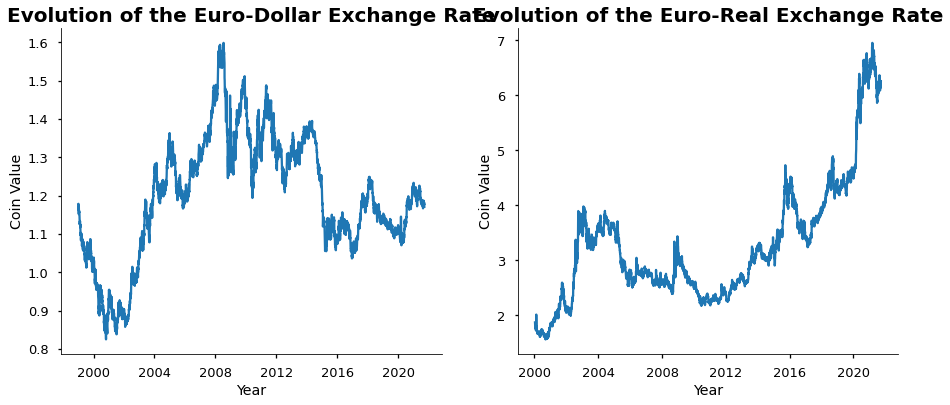

In [13]:
# the temporary plotting style
style.use('seaborn-talk')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(euro2dollar['Time'], euro2dollar['US_dollar'])
ax2.plot(euro2real['Time'], euro2real['Brazilian_real'])

for ax in [ax1, ax2]:
    ax.set_xlabel('Year')
    ax.set_ylabel('Coin Value')
    
    for location in ['right', 'top']:
        ax.spines[location].set_visible(False)

ax1.set_title('Evolution of the Euro-Dollar Exchange Rate', size=20, weight='bold')
ax2.set_title('Evolution of the Euro-Real Exchange Rate', size=20, weight='bold')

plt.show()

## Analysing the rolling means
Visualizaing for different rolling window sizes, how the data is plotted to us. For long-term trends, the curves are smoother as we can see bellow.

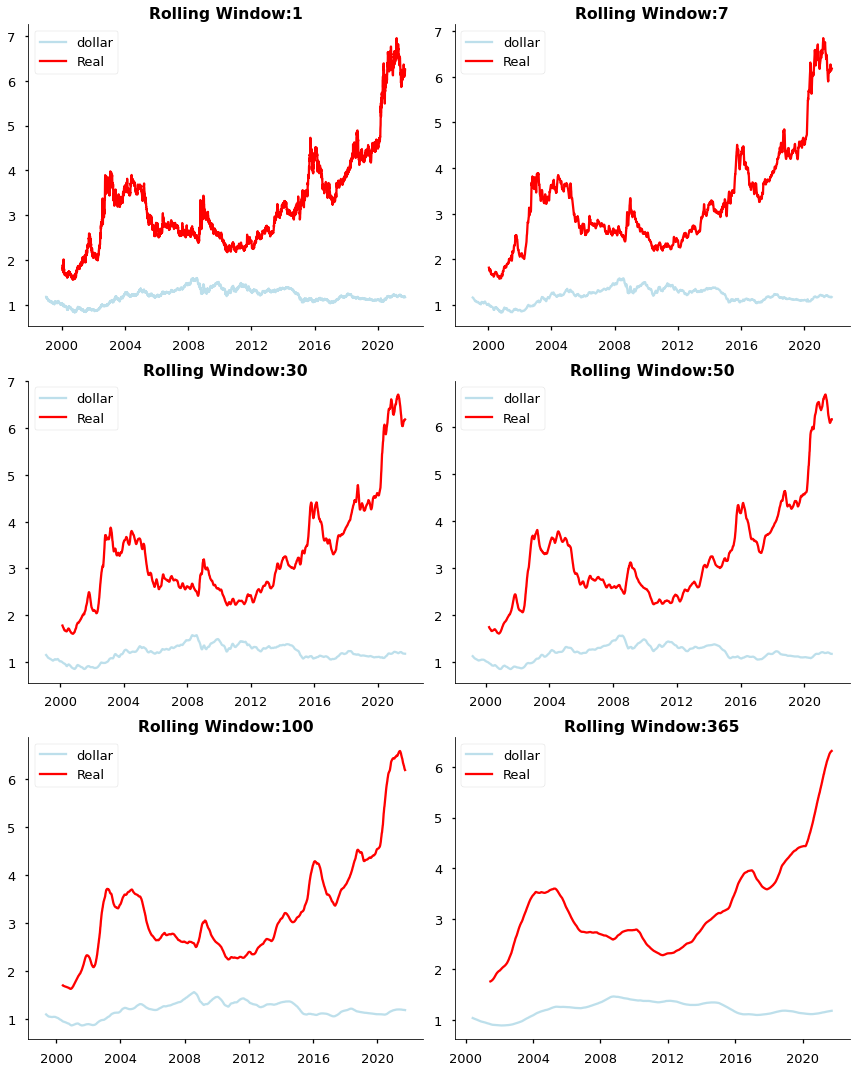

In [14]:
fig = plt.figure(figsize=(12, 15))

rolling_window = [1, 7, 30, 50, 100, 365]
plot_number = range(1, 7)
for i, rolling_mean in zip(plot_number, rolling_window):
    ax = fig.add_subplot(3, 2, i)
    
    for location in ['right', 'top']:
        ax.spines[location].set_visible(False)
    
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    ax.plot(euro2dollar['Time'], euro2dollar['US_dollar'].rolling(rolling_mean).mean(), color='lightblue', label='dollar', alpha=0.8)
    ax.plot(euro2real['Time'], euro2real['Brazilian_real'].rolling(rolling_mean).mean(), color='red', label='Real')
    ax.legend()

plt.tight_layout()
plt.show()

In [15]:
# setting the rollng mean for euro2real and euro2dollar
euro2dollar['rolling_mean'] = euro2dollar['US_dollar'].rolling(30).mean()
euro2real['rolling_mean'] = euro2real['Brazilian_real'].rolling(30).mean()

## Visualizing the Euro-Dollar exchange rate for last 3 United States presidents
Here, our objective is to see how the euro to dollar parity fluctuated over the passage of the last 3 presidents of United States (without including Binden). For this, we need to know that here:

* George W. Bush: 2001 ~ 2009;
* Barack Obama: 2009 ~ 2017;
* Donald Trump: 2017 ~ 20/012021;
* Joe Biden: 20/01/2021;

So we have to filter our data, since it started on 1999.

In [16]:
# segmenting the full dataset to its respective president   
df_all_presidents = euro2dollar.copy().loc[(euro2dollar['Time'].dt.year >= 2001)]
bush = df_all_presidents.copy().loc[df_all_presidents['Time'].dt.year < 2009]
obama = df_all_presidents.copy().loc[(euro2dollar['Time'].dt.year >= 2009) & (euro2dollar['Time'].dt.year < 2017)]
trump = df_all_presidents.copy().loc[(df_all_presidents['Time'].dt.year >= 2017) & (df_all_presidents['Time'] < '2021-01-20')]
biden = df_all_presidents.copy().loc[(df_all_presidents['Time'] >= '2021-01-20')]

/tmp/ipykernel_77749/1071529218.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '', '2007', '', '2009'], alpha=0.3)
/tmp/ipykernel_77749/1071529218.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '', '2015', '', '2017'], alpha=0.3)
/tmp/ipykernel_77749/1071529218.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['2017', '', '2018', '', '2019', '', '2020', '', '2021'], alpha=0.3)
/tmp/ipykernel_77749/1071529218.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['2021', '', '2022'], alpha=0.3)


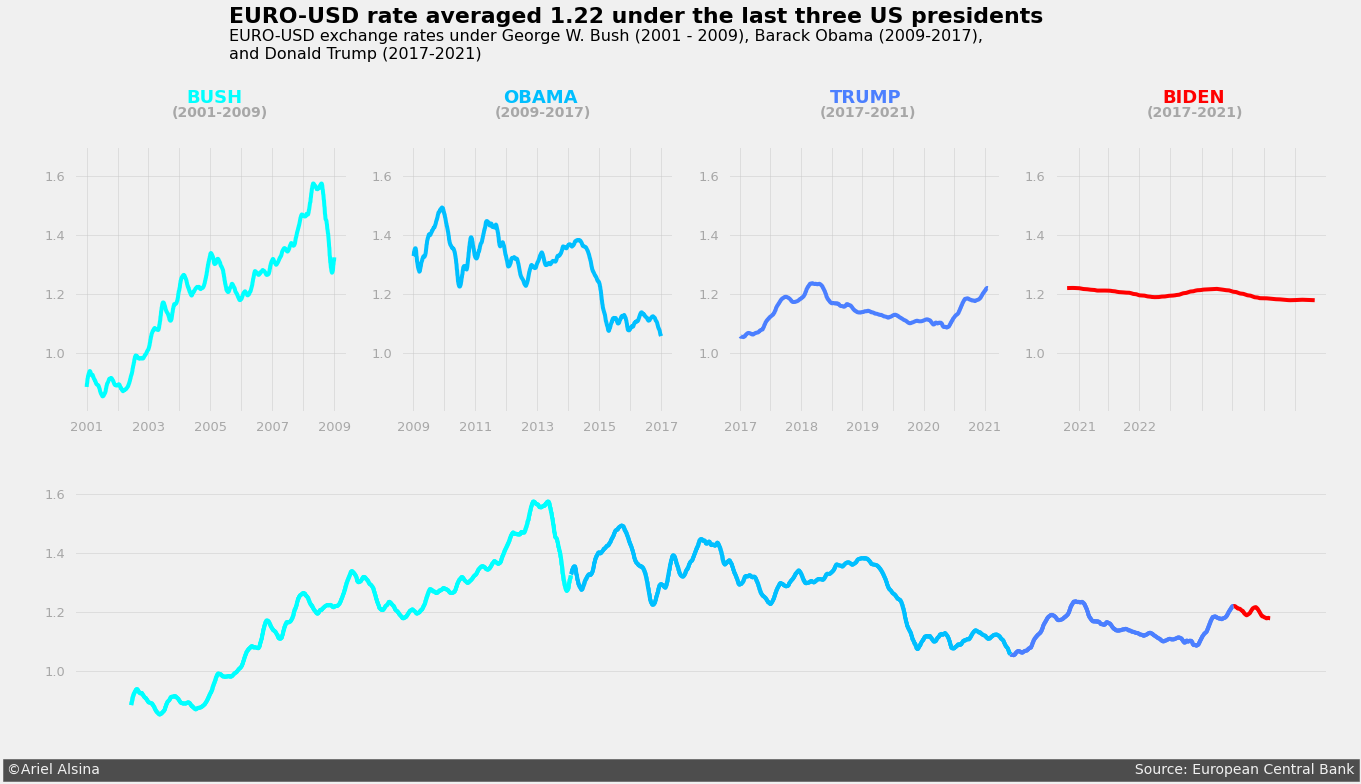

In [61]:
style.use('fivethirtyeight')

# creating the subplots
plt.figure(figsize=(20, 10))

# two rows: one with 3 graphs side-to-side and the second with only a bigger graph
ax1 = plt.subplot(2, 4, 1)
ax2 = plt.subplot(2, 4, 2)
ax3 = plt.subplot(2, 4, 3)
ax4 = plt.subplot(2, 4, 4)
ax5 = plt.subplot(2, 1, 2)

# changes to all the subplots
axes = [ax1, ax2, ax3, ax4, ax5]
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],  alpha=0.3)
    ax.grid(alpha=0.5)    

# ploting for Bush
ax1.plot(bush['Time'], bush['rolling_mean'], color='#00FFFF')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '', '2007', '', '2009'], alpha=0.3)
ax1.text(12500, 1.85, 'BUSH', fontsize=18, weight='bold', color='#00FFFF')
ax1.text(12330, 1.8, '(2001-2009)', weight='bold', alpha=0.3)

# plotting for Obama
ax2.plot(obama['Time'], obama['rolling_mean'], color='#00BFFF')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '', '2015', '', '2017'], alpha=0.3)
ax2.text(15300.0, 1.85, 'OBAMA', fontsize=18, weight='bold', color='#00BFFF')
ax2.text(15200.0, 1.8, '(2009-2017)', weight='bold', alpha=0.3)

# plotting for Trump
ax3.plot(trump['Time'], trump['rolling_mean'], color='#4B7FFF')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '', '2020', '', '2021'], alpha=0.3)
ax3.text(17700.0, 1.85, 'TRUMP', fontsize=18, weight='bold', color='#4B7FFF')
ax3.text(17640.0, 1.8, '(2017-2021)', weight='bold', alpha=0.3)

#plotting for Biden
ax4.plot(biden['Time'], biden['rolling_mean'], color='#FF0000')
ax4.set_xticklabels(['2021', '', '2022'], alpha=0.3)
ax4.text(18740.0, 1.85, 'BIDEN', fontsize=18, weight='bold', color='#FF0000')
ax4.text(18725.0, 1.8, '(2017-2021)', weight='bold', alpha=0.3)

# plotting for all presidents together
ax5.plot(bush['Time'], bush['rolling_mean'], color='#00FFFF')
ax5.plot(obama['Time'], obama['rolling_mean'], color='#00BFFF')
ax5.plot(trump['Time'], trump['rolling_mean'], color='#4B7FFF')

ax5.plot(bush['Time'], bush['rolling_mean'], color='#00FFFF')
ax5.plot(obama['Time'], obama['rolling_mean'], color='#00BFFF')
ax5.plot(trump['Time'], trump['rolling_mean'], color='#4B7FFF')
ax5.plot(biden['Time'], biden['rolling_mean'], color='#FF0000')
ax5.grid(alpha=0.5)
ax5.set_xticks([])

# title and subtile being added
ax1.text(13000.0, 2.12, 'EURO-USD rate averaged 1.22 under the last three US presidents', fontsize=22, weight='bold')
ax1.text(13000.0, 2.0, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''', fontsize=16)

# adding the signature
ax5.text(10500.0, 0.65, '©Ariel Alsina' + ' '*230 + 'Source: European Central Bank', 
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)


plt.show()

In [62]:
df_all_brazil = euro2real.copy()
fhc = df_all_brazil.copy()[df_all_brazil['Time'].dt.year < 2002]
lula = df_all_brazil.copy()[(df_all_brazil['Time'].dt.year >= 2002) & (df_all_brazil['Time'].dt.year < 2010)]
dilma = df_all_brazil.copy()[(df_all_brazil['Time'].dt.year >= 2010) & (df_all_brazil['Time'] < '2016-09-01')]
temer = df_all_brazil.copy()[(df_all_brazil['Time'] >= '2016-09-01') & (df_all_brazil['Time'].dt.year < 2018)]
bozo = df_all_brazil.copy()[(df_all_brazil['Time'].dt.year >= 2018)]

## Visualizing the Euro-Real exchange rate for last 5 Brazilian presidents
Here, our objective is to see how the euro to real parity fluctuated over the passage of the last 5 presidents of Brazil. For this, we need to know that here:

* Fernando H. Cardoso: ~ 2002;
* Lula: 2002 ~ 2010;
* Dilma: 2010 ~ 31/08/2016;
* Temer: 01/09/2016 ~ 2018;
* Bolsonaro: 2018 ~ today;


/tmp/ipykernel_77749/399703044.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_fhc.set_xticklabels(['1999', '', '', '2001', '', '', '2002'], alpha=0.3)
/tmp/ipykernel_77749/399703044.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_lula.set_xticklabels(['', '2003', '', '', '', '2007', '', '', '', '2011'], alpha=0.3)
/tmp/ipykernel_77749/399703044.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_dilma.set_xticklabels(['', '2012', '', '', '2014', '', '', '2016'], alpha=0.3)
/tmp/ipykernel_77749/399703044.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_temer.set_xticklabels(['', '2016', '',  '', '2017', '', '', '2018'], alpha=0.3)
/tmp/ipykernel_77749/399703044.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_bozo.set_xticklabels(['', '2019', '', '', '2020', '', '', '2021'], alpha=0.3)


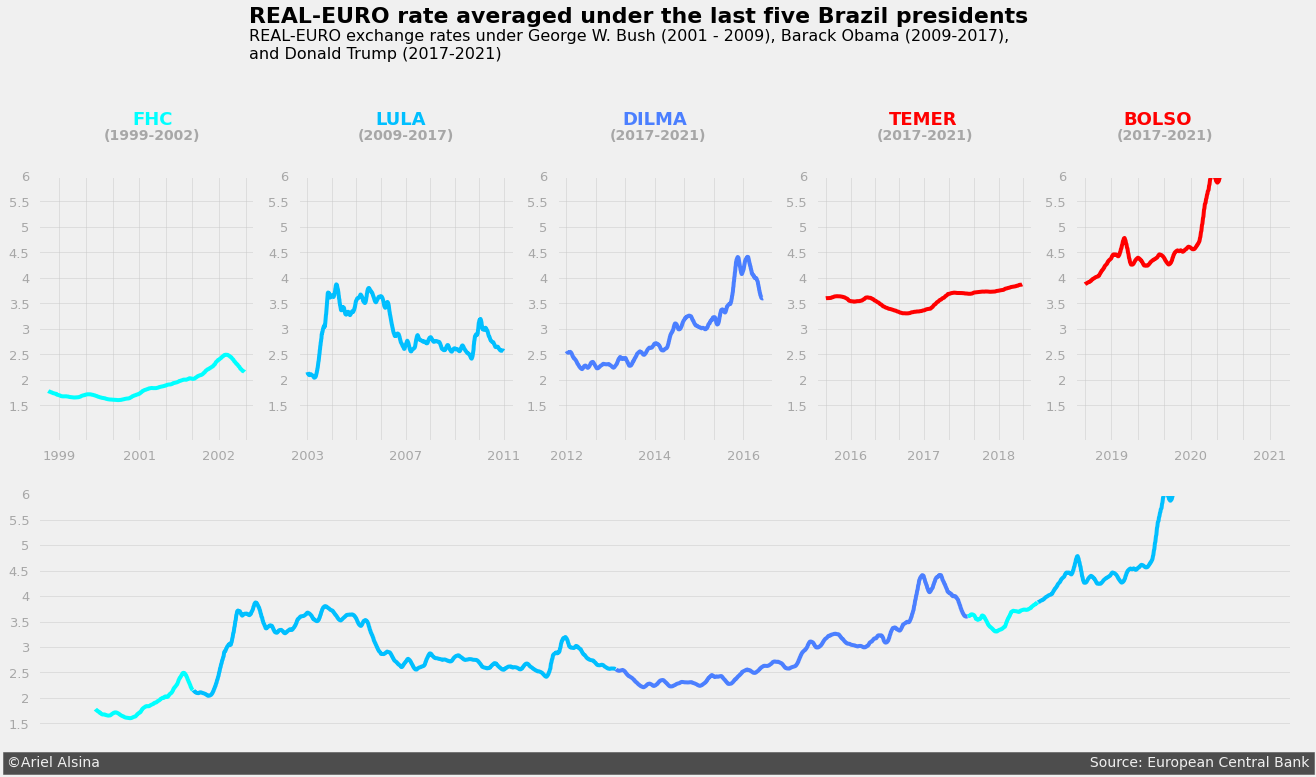

In [153]:
style.use('fivethirtyeight')

# creating the subplots
plt.figure(figsize=(20, 10))

# two rows: one with 3 graphs side-to-side and the second with only a bigger graph
ax_fhc = plt.subplot(2, 5, 1)
ax_lula = plt.subplot(2, 5, 2)
ax_dilma = plt.subplot(2, 5, 3)
ax_temer = plt.subplot(2, 5, 4)
ax_bozo = plt.subplot(2, 5, 5)
ax_all = plt.subplot(2, 1, 2)

# changes to all the subplots
axes = [ax_fhc, ax_lula, ax_dilma, ax_temer, ax_bozo, ax_all]
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0])
    ax.set_yticklabels(['1.5', '2','2.5', '3', '3.5', '4', '4.5', '5', '5.5', '6'], alpha=0.3)
    ax.grid(alpha=0.5)       

# ploting for FHC
ax_fhc.plot(fhc['Time'], fhc['rolling_mean'], color='#00FFFF')
ax_fhc.set_xticklabels(['1999', '', '', '2001', '', '', '2002'], alpha=0.3)
ax_fhc.text(11300.0, 7.0, 'FHC', fontsize=18, weight='bold', color='#00FFFF')
ax_fhc.text(11200, 6.7, '(1999-2002)', weight='bold', alpha=0.3)

# plotting for Lula
ax_lula.plot(lula['Time'], lula['rolling_mean'], color='#00BFFF')
ax_lula.set_xticklabels(['', '2003', '', '', '', '2007', '', '', '', '2011'], alpha=0.3)
ax_lula.text(12700.0, 7.0, 'LULA', fontsize=18, weight='bold', color='#00BFFF')
ax_lula.text(12430.0, 6.7, '(2009-2017)', weight='bold', alpha=0.3)

# plotting for Dilma
ax_dilma.plot(dilma['Time'], dilma['rolling_mean'], color='#4B7FFF')
ax_dilma.set_xticklabels(['', '2012', '', '', '2014', '', '', '2016'], alpha=0.3)
ax_dilma.text(15300.0, 7.0, 'DILMA', fontsize=18, weight='bold', color='#4B7FFF')
ax_dilma.text(15150.0, 6.7, '(2017-2021)', weight='bold', alpha=0.3)

#plotting for Temer
ax_temer.plot(temer['Time'], temer['rolling_mean'], color='#FF0000')
ax_temer.set_xticklabels(['', '2016', '',  '', '2017', '', '', '2018'], alpha=0.3)
ax_temer.text(17200.0, 7.0, 'TEMER', fontsize=18, weight='bold', color='#FF0000')
ax_temer.text(17170.0, 6.7, '(2017-2021)', weight='bold', alpha=0.3)

#plotting for Bolsonaro
ax_bozo.plot(bozo['Time'], bozo['rolling_mean'], color='#FF0000')
ax_bozo.set_xticklabels(['', '2019', '', '', '2020', '', '', '2021'], alpha=0.3)
ax_bozo.text(17800.0, 7.0, 'BOLSO', fontsize=18, weight='bold', color='#FF0000')
ax_bozo.text(17750.0, 6.7, '(2017-2021)', weight='bold', alpha=0.3)

# plotting for all presidents together
ax_all.plot(fhc['Time'], fhc['rolling_mean'], color='#00FFFF')
ax_all.plot(lula['Time'], lula['rolling_mean'], color='#00BFFF')
ax_all.plot(dilma['Time'], dilma['rolling_mean'], color='#4B7FFF')
ax_all.plot(temer['Time'], temer['rolling_mean'], color='#00FFFF')
ax_all.plot(bozo['Time'], bozo['rolling_mean'], color='#00BFFF')
ax_all.grid(alpha=0.5)
ax_all.set_xticks([])

# title and subtile being added
ax_fhc.text(11700.0, 9.0, 'REAL-EURO rate averaged under the last five Brazil presidents', fontsize=22, weight='bold')
ax_fhc.text(11700.0, 8.3, '''REAL-EURO exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''', fontsize=16)

# adding the signature
ax_all.text(10400.0, 0.65, '©Ariel Alsina' + ' '*220 + 'Source: European Central Bank', 
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)


plt.show() 